# Density Transformations & random number generators
__Group: ALT, Andreea, Laura, Tien__

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1) The Inverse CDF method

__(b) Implement your procedure for verification and generate 500 samples for a Laplacian random variable $X$ with a specific mean $\mu$ = 1 and scale parameter $b$ = 2. Plot a density estimate (e.g. normalized histogram) for these samples overlayed with the pdf $p_X (x)$ from above.__

In [2]:
mu = 1
b = 2

In [3]:
def laplacian_random(z,mu,b):
    """
    :param mu: mean of the laplacian distribution
    :param b: scale parameter of the laplacian distribution
    return inverse laplace cdf for sampling random variables with laplace distribution, 
    given that z is also an array with uniformly distributed random numbers
    """
    random = np.zeros_like(z)
    random[z>= 0.5] = mu - b*np.log(2-2*z[z>= 0.5])
    random[z < 0.5] = mu + b*np.log(2*z[z< 0.5])
    return random

In [4]:
def laplacian_pdf(x,mu,b):
    """
    :param mu: mean of the laplacian distribution
    :param b: scale parameter of the laplacian distribution
    """
    return 1/(2*b)*np.exp(-np.abs(x-mu)/b)
    

In [5]:
z = np.random.uniform(size = 500)
samples = laplacian_random(z,mu, b)

min_, max_ = samples.min(), samples.max()
steps = np.linspace(min_, max_, 500)

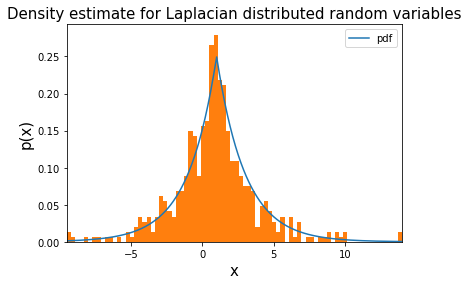

In [6]:
plt.plot(steps, laplacian_pdf(steps, mu =1,b=2), label = 'pdf')
plt.xlim(min_, max_)
plt.hist(samples, density = True, bins = 80)
plt.title('Density estimate for Laplacian distributed random variables', fontsize = 15)
plt.xlabel('x', fontsize = 15)
plt.ylabel('p(x)', fontsize = 15)
plt.legend()
plt.show()